In [2]:
from bs4 import BeautifulSoup
import requests
import re

### Notes on gas prices

1. Gather data for nominal price of gas standardize on yearly price
1. cleaning and transforming
1. adjust prices for inflation
1. graph the nominal and real prices
5. choose some other item with historical prices to compare to gas

In [3]:
gaspage = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
dataSoup = BeautifulSoup(gaspage.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### Format of output:

The result will be a dictionary with two keys **year** and **price**

```
{ 'year': [1949, 1950, ...], 'price': [.28, .32, ...]}
```

In [20]:
non_decimal = re.compile(r'[^\d.]+')
yearlist = []
pricelist = []
gasrows = dataSoup.find_all('tr')

for i in range(4, len(gasrows)):
    crow = gasrows[i].find_all('td')
    year = int(crow[0].text)
    yearlist.append(year)
    
    if year < 1990:
        price = float(non_decimal.sub('', crow[1].text))
    elif year >= 1990:
        price = float(non_decimal.sub('', crow[4].text))
    pricelist.append(price)
    
    if year == 2011: break;
    
dataDict = {'year': yearlist, 'price': pricelist}
print(dataDict)

{'year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011], 'price': [0.268, 0.268, 0.272, 0.274, 0.287, 0.29, 0.291, 0.299, 0.31, 0.304, 0.305, 0.311, 0.308, 0.306, 0.304, 0.304, 0.312, 0.321, 0.332, 0.337, 0.348, 0.357, 0.364, 0.361, 0.388, 0.532, 0.567, 0.59, 0.622, 0.627, 0.857, 1.191, 1.311, 1.222, 1.158, 1.129, 1.115, 0.857, 0.897, 0.9, 0.997, 1.611, 1.524, 1.471, 1.415, 1.391, 1.406, 1.48, 1.458, 1.237, 1.342, 1.702, 1.61, 1.473, 1.69, 1.942, 2.295, 2.508, 2.637, 3.008, 2.142, 2.512, 3.111]}


### Adding Real Prices

1. Scrape headline CPI data from the internet
2. Clean the CPI data, and add it to the data dictionary
7. Use the CPI data and the nominal gas prices to calculate corresponding real prices

In [45]:
cpipage = requests.get("http://inflationdata.com/Inflation/Consumer_Price_Index/HistoricalCPI.aspx?reloaded=true")
cpiSoup = BeautifulSoup(cpipage.text)
cpirows = cpiSoup.find_all('tr')
realPriceList = []
cpiList = []

for i in range(1, len(gasrows)):
    crow = cpirows[i].find_all('td')
    curYear = int(crow[0].text)
    if curYear in dataDict['year']:
        cpi = float(crow[13].text)
        cpiList.insert(0, cpi)

dataDict['cpi'] = cpiList
nowcpi = cpiList[-1]
for i in range(63):
    oldcpi = cpiList[i]
    oldprice = pricelist[i]
    realprice = (nowcpi/oldcpi)*oldprice
    realPriceList.append(round(realprice, 3))
dataDict['real price'] = realPriceList

print(dataDict)

{'cpi': [23.8, 24.1, 26.0, 26.5, 26.7, 26.9, 26.8, 27.2, 28.1, 28.9, 29.1, 29.6, 29.9, 30.2, 30.6, 31.0, 31.5, 32.4, 33.4, 34.8, 36.7, 38.8, 40.5, 41.8, 44.4, 49.3, 53.8, 56.9, 60.6, 65.2, 72.6, 82.4, 90.9, 96.5, 99.6, 103.9, 107.6, 109.6, 113.6, 118.3, 124.0, 130.7, 136.2, 140.3, 144.5, 148.2, 152.4, 156.9, 160.5, 163.0, 166.6, 172.2, 177.1, 179.88, 183.96, 188.9, 195.3, 201.6, 207.342, 215.303, 214.537, 218.056, 224.939], 'real price': [2.533, 2.501, 2.353, 2.326, 2.418, 2.425, 2.442, 2.473, 2.482, 2.366, 2.358, 2.363, 2.317, 2.279, 2.235, 2.206, 2.228, 2.229, 2.236, 2.178, 2.133, 2.07, 2.022, 1.943, 1.966, 2.427, 2.371, 2.332, 2.309, 2.163, 2.655, 3.251, 3.244, 2.848, 2.615, 2.444, 2.331, 1.759, 1.776, 1.711, 1.809, 2.773, 2.517, 2.358, 2.203, 2.111, 2.075, 2.122, 2.043, 1.707, 1.812, 2.223, 2.045, 1.842, 2.066, 2.313, 2.643, 2.798, 2.861, 3.143, 2.246, 2.591, 3.111], 'year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### Dataframes!

9. Transform the dictionary of data into a pandas DataFrame
4. Also, use matplotlib to make magical convenient plots

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
df = pd.DataFrame(dataDict)
df.head()

,cpi,price,real price,year
0,23.8,0.268,2.533,1949
1,24.1,0.268,2.501,1950
2,26.0,0.272,2.353,1951
3,26.5,0.274,2.326,1952
4,26.7,0.287,2.418,1953


In [52]:
df.to_excel('testing.xlsx')

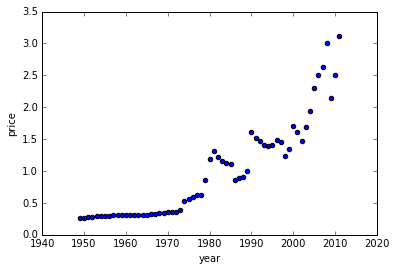

In [36]:
df.plot(x='year', y='price', kind='scatter')

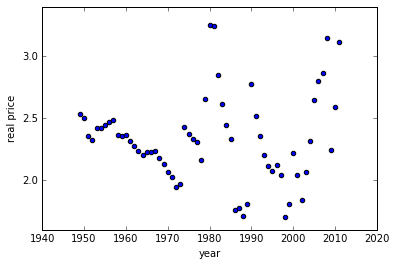

In [48]:
df.plot(x='year', y='real price', kind='scatter')

### Pandas and Excel

pandas is capable of reading Excel files, and turning them into data frames.

In [49]:
cpidat = pd.read_excel('cpi_data.xlsx', skiprows=range(9), header=1)
cpidat = cpidat.set_index(keys='Year')
cpidat.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
Year,,,,,,,,,,,,,,
1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN
1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN
1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN
1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN
1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN
